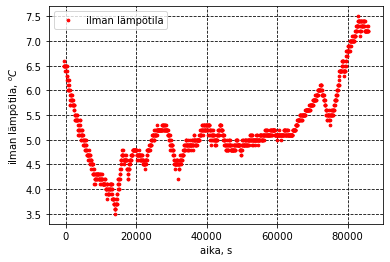

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'

df = pd.read_csv(url, sep=',', decimal='.')

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

start_date = df['Unnamed: 0'].min()
end_date = df['Unnamed: 0'].max()

position = df.columns.get_loc('Unnamed: 0')

df.iloc[0, position]

df['aika s'] = df.iloc[1:, position] - df.iat[0, position]
df['aika s'] = df['aika s'].dt.total_seconds()

df2 = df[['Air temperature, degC', 'aika s']]
df2 = df2.head()
df2

plt.plot(df['aika s'], df['Air temperature, degC'], 'ro', label='ilman lämpötila', markersize=2.7)
plt.xlabel('aika, s')
plt.ylabel('ilman lämpötila, $^{o}C$')
plt.legend()
plt.grid(color='k', linestyle='--')
plt.show()

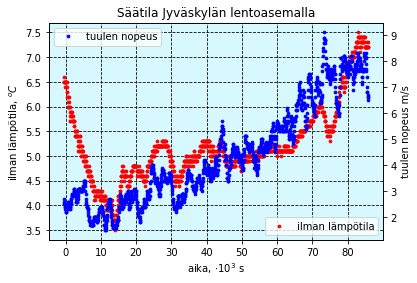

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'

df3 = pd.read_csv(url, sep=',', decimal='.')

df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])

start_date = df3['Unnamed: 0'].min()
end_date = df3['Unnamed: 0'].max()

position = df3.columns.get_loc('Unnamed: 0')

df3.iloc[0, position]

df3['aika s'] = df3.iloc[1:, position] - df3.iat[0, position]
df3['aika s'] = df3['aika s'].dt.total_seconds() / 1000

df4 = df3[['Air temperature, degC', 'Wind speed, m/s']]
df4 = df4.head()
df4

fig, ax1 = plt.subplots()

ax1.plot(df3['aika s'], df3['Air temperature, degC'], 'ro', label='ilman lämpötila', markersize=2.7)
ax1.set_xlabel('aika, $\cdot 10^{3}$ s')
ax1.set_ylabel('ilman lämpötila, $^{o}C$')
ax1.legend(loc=4)
ax1.set_facecolor('#D7F8FF')
ax1.xaxis.set_ticks(np.arange(0, 90, 10))
plt.grid(color='k', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(df3['aika s'], df3['Wind speed, m/s'], 'bo', label='tuulen nopeus', markersize=2.7)
ax2.set_ylabel('tuulen nopeus m/s')
ax2.legend(loc=0)
plt.title('Säätila Jyväskylän lentoasemalla')
plt.show()

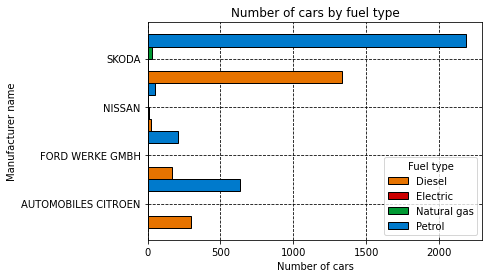

In [216]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'

df5 = pd.read_csv(url,sep="\t",quoting=csv.QUOTE_NONE).replace('"','',regex=True)
df5.columns = df5.columns.str.strip('"')

carsdf = df5['Mh'].value_counts()
mask = df5['Mh'].value_counts() > 50
carlist = np.array(carsdf[mask].index)
df6 = df5.loc[df5['Mh'].isin(carlist)]

df6 = df6.copy()

df6['Ft'] = df6['Ft'].replace('DIESEL', 'Diesel')
df6['Ft'] = df6['Ft'].replace('PETROL', 'Petrol')
df6['Ft'] = df6['Ft'].replace('NG', 'Natural gas')

df6['Fuel type'] = df6['Ft']

df7 = pd.crosstab(df6['Mh'], df6['Fuel type'])

ax = df7.plot.barh(stacked=False, zorder=3, width=1, color=['#e67300', '#cc0000', '#009933', '#007acc'], edgecolor='k')
ax.set_xlabel('Number of cars')
ax.set_ylabel('Manufacturer name')
ax.grid(color='k', linestyle='--', zorder=0)
plt.title('Number of cars by fuel type')
plt.show()

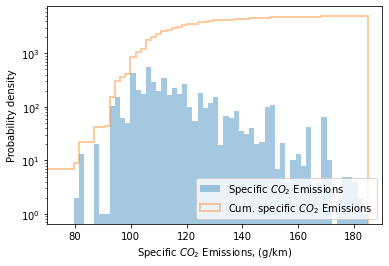

In [169]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'

df8 = pd.read_csv(url,sep="\t",quoting=csv.QUOTE_NONE).replace('"','',regex=True)
df8.columns = df8.columns.str.strip('"')

Mh = df8['Mh'].value_counts()
mask1 = df8['Mh'].value_counts() > 50
carlist = np.array(Mh[mask1].index)
df9 = df8.loc[df8['Mh'].isin(carlist)]

Endec = df9['Enedc (g/km)'].value_counts()
mask2 = df9['Enedc (g/km)'].value_counts() > 0
carlist = np.array(Endec[mask2].index)
df10 = df9.loc[df9['Enedc (g/km)'].isin(carlist)]

ax1 = sns.distplot(df10['Enedc (g/km)'].dropna(), kde=False, bins=100, label='Specific $CO_2$ Emissions')
ax1.set_ylabel('Probability density')
ax1.set_yscale('log')
ax1.xaxis.set_ticks(np.arange(60, 200, 20))
plt.xlim(70, 190)

kwargs = {'cumulative' : True}
ax2 = sns.distplot(df10['Enedc (g/km)'].dropna(),
                   hist_kws=dict(kwargs, histtype="step", linewidth=2),
                   kde=False,
                   bins=100,
                   label='Cum. specific $CO_2$ Emissions',
                   ax=ax1)
ax2.set_xlabel('Specific $CO_2$ Emissions, (g/km)')
ax1.legend(loc=4)

plt.show()

In [171]:
#ASSIGNMENT 5 TODO IF TIME

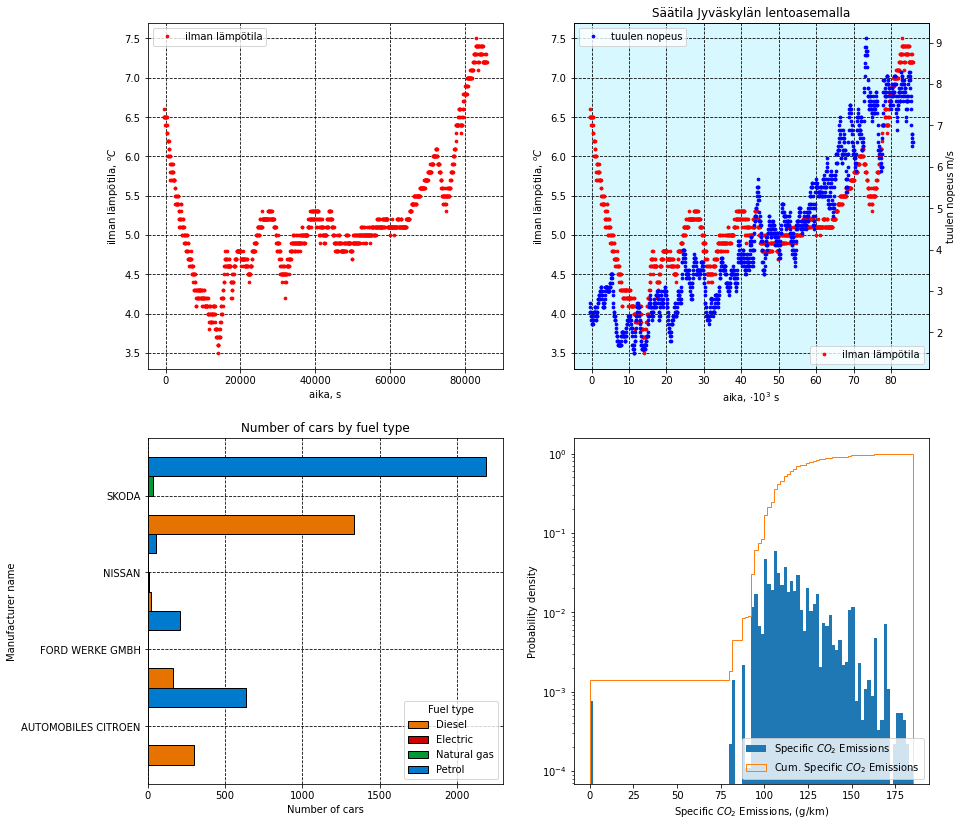

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Data for 1 and 2
url1='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'

# Data for 3 and 4
url2='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'

# This code is for 1st assignment
df11 = pd.read_csv(url1, sep=',', decimal='.')

df11['Unnamed: 0'] = pd.to_datetime(df11['Unnamed: 0'])

start_date = df11['Unnamed: 0'].min()
end_date = df11['Unnamed: 0'].max()

position = df11.columns.get_loc('Unnamed: 0')

df11.iloc[0, position]

df11['aika s'] = df11.iloc[1:, position] - df11.iat[0, position]
df11['aika s'] = df11['aika s'].dt.total_seconds()

df12 = df11[['Air temperature, degC', 'aika s']]
df12 = df12.head()
df12

# This code is for 3rd assignment
df14 = pd.read_csv(url2,sep="\t",quoting=csv.QUOTE_NONE).replace('"','',regex=True)
df14.columns = df14.columns.str.strip('"')

Mh2 = df14['Mh'].value_counts()
mask3 = df14['Mh'].value_counts() > 50
carlist = np.array(Mh2[mask3].index)
df15 = df14.loc[df14['Mh'].isin(carlist)]

# Assignment 3 specific code
df15 = df15.copy()

df15['Ft'] = df15['Ft'].replace('DIESEL', 'Diesel')
df15['Ft'] = df15['Ft'].replace('PETROL', 'Petrol')
df15['Ft'] = df15['Ft'].replace('NG', 'Natural gas')

df15['Fuel type'] = df15['Ft']
df16 = pd.crosstab(df15['Mh'], df15['Fuel type'])


# Plot 1 assignment graph
fig, ax = plt.subplots(2, 2)

# Resize figures
fig.set_size_inches(14, 14)

ax[0,0].plot(df11['aika s'], df11['Air temperature, degC'], 'ro', label='ilman lämpötila', markersize=2.7)
ax[0,0].set_xlabel('aika, s')
ax[0,0].set_ylabel('ilman lämpötila, $^{o}C$')
ax[0,0].legend()
ax[0,0].grid(color='k', linestyle='--')

# Do required extra modifications for 2nd assignment
df13 = df11
df13['aika s'] = df13['aika s'] / 1000

# 3rd Assignment graph
ax[1,0] = df16.plot.barh(stacked=False, zorder=3,
                         width=1,
                         color=['#e67300', '#cc0000', '#009933', '#007acc'],
                         edgecolor='k',
                         ax=ax[1,0])
ax[1,0].set_xlabel('Number of cars')
ax[1,0].set_ylabel('Manufacturer name')
ax[1,0].grid(color='k', linestyle='--', zorder=0)
plt.title('Number of cars by fuel type')
ax[1,0].set_title('Number of cars by fuel type')

# Plot 2nd assignment graph
ax[0,1].plot(df13['aika s'], df13['Air temperature, degC'], 'ro', label='ilman lämpötila', markersize=2.7)
ax[0,1].set_xlabel('aika, $\cdot 10^{3}$ s')
ax[0,1].set_ylabel('ilman lämpötila, $^{o}C$')
ax[0,1].legend(loc=4)
ax[0,1].set_facecolor('#D7F8FF')
ax[0,1].xaxis.set_ticks(np.arange(0, 90, 10))
ax[0,1].grid(color='k', linestyle='--')

ax2 = ax[0,1].twinx()
ax2.plot(df13['aika s'], df13['Wind speed, m/s'], 'bo', label='tuulen nopeus', markersize=2.7)
ax2.set_ylabel('tuulen nopeus m/s')
ax2.legend(loc=0)
#plt.title('Säätila Jyväskylän lentoasemalla')
ax[0,1].set_title('Säätila Jyväskylän lentoasemalla')

# 4th Assignment specific code
Endec = df15['Enedc (g/km)'].value_counts()
mask4 = df15['Enedc (g/km)'].value_counts() > 0
carlist = np.array(Endec[mask4].index)
df16 = df15.loc[df15['Enedc (g/km)'].isin(carlist)]

# 4th Assignment graph
# This was changed to MatPlotLib graph from Seaborn graph because the formatting of sns messed up formatting of other graphs.
# I am sure there is a way to fix that as well but due to time constraints, a compromoise was made.
data = df16['Enedc (g/km)']
ax[1,1].hist(data, bins=100,density=True, log=True, label='Specific $CO_2$ Emissions')
ax[1,1].hist(data, bins=100,density=True,cumulative=True, histtype='step', label='Cum. Specific $CO_2$ Emissions')
ax[1,1].set_ylabel('Probability density')
ax[1,1].set_xlabel('Specific $CO_2$ Emissions, (g/km)')
ax[1,1].legend(loc='lower right')

# Finally draw graphs
plt.show()